# How to save parameters along with the function 

This is a workaround for the problem of how to save *and restore* the parameters of a workflow (e.g., sigma for blurring, threshold values, etc) along with the functions. The idea is simple:

Instead of setting workflow steps with, for instance, `w.set('blurring', blur_function, 'input', sigma=5)`, this notebook creates a partial function of `blur_function()` which is then added to the workflow. When the workflow is loaded and the partial function is passed to magicgui, the parameters are restored correctly.

In [2]:
from napari_workflows import Workflow
from napari.types import ImageData
import napari
import yaml
from skimage.filters import threshold_otsu, gaussian
import inspect
import magicgui
from functools import partial
from napari_tools_menu import make_gui
from skimage.io import imread, imshow

### Third Fix:

Get function from workflow file and change its default parameters settings by changing func.__defaults__:

C:\Users\ryans\anaconda3\envs\np_workflows_v1\lib\site-packages\dask\core.py:119: FutureWarning: Providing the `multichannel` argument positionally to gaussian is deprecated. Use the `channel_axis` kwarg instead.
  return func(*(_execute_task(a, cache) for a in args))


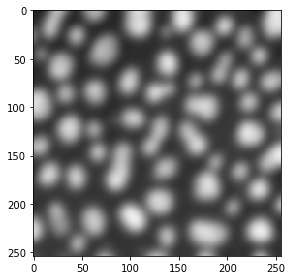

In [3]:
filename = r'C:/Users/ryans/Desktop/blobs.tif'

w = Workflow()
w.set('denoised',gaussian,'input',sigma = 5)
w.set('input', imread(filename))

imshow(w.get('denoised'))

In [8]:
inspect.signature(gaussian)

<Signature (image, sigma=1, output=None, mode='nearest', cval=0, multichannel=None, preserve_range=False, truncate=4.0, *, channel_axis=None)>

In [9]:
for task in w._tasks.keys():
    func = w._tasks[task][0]  # extract function from workflow
    keyword_list = list(inspect.signature(func).parameters.keys())  # get name of kwargs
    
    # retrieve keyword - saved value dictionary from saved workflow
    kw_dict = {}
    for kw, val in zip(keyword_list, w._tasks[task][1:]):
        kw_dict[kw] = val
    kw_dict.pop('image')
    
    # change defaults of restored function and add to viewer
    defaults = ()
    for key in kw_dict.keys():
        defaults += tuple([kw_dict[key]])
    
    func.__defaults__ = defaults
    widget = make_gui(func, viewer)
    
    viewer.window.add_dock_widget(widget)    

NameError: name 'viewer' is not defined

In [12]:
func

<function __main__.blur(image: napari.types.ImageData, sigma: float = 5) -> napari.types.ImageData>

In [14]:
blur

<function __main__.blur(image: napari.types.ImageData, sigma: float = 5) -> napari.types.ImageData>